In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


In [114]:
# Load the data
tweets_df = pd.read_csv('dataset.csv')

In [115]:
tweets_df = tweets_df[1:33000]
print(tweets_df)

                                                   tweet  bullying
1      anti greek nationalis wikipedia hi alexikoua y...         1
2               dis hoe wasnt dis violent lottery ticket         1
3       better atabay helping banned vandals pushing pov         0
4      camelcase sicko camelcase camelcase rule r bal...         0
5      hi requested arbitration wikipedia requests ar...         0
...                                                  ...       ...
32995  proposition ya hey got propositon heres deal i...         0
32996     suggest report administrator wp request blocks         0
32997  still talking animals know asian folks would l...         1
32998  find extremely alarming someone would remove q...         0
32999  tha wats happening made message board go back ...         0

[32999 rows x 2 columns]


In [116]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32999 entries, 1 to 32999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet     32984 non-null  object
 1   bullying  32999 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 515.7+ KB


In [117]:
tweets_df.describe()

bullying
count  32999.000000
mean       0.201067
std        0.400804
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000

In [118]:
tweets_df['tweet']

1        anti greek nationalis wikipedia hi alexikoua y...
2                 dis hoe wasnt dis violent lottery ticket
3         better atabay helping banned vandals pushing pov
4        camelcase sicko camelcase camelcase rule r bal...
5        hi requested arbitration wikipedia requests ar...
                               ...                        
32995    proposition ya hey got propositon heres deal i...
32996       suggest report administrator wp request blocks
32997    still talking animals know asian folks would l...
32998    find extremely alarming someone would remove q...
32999    tha wats happening made message board go back ...
Name: tweet, Length: 32999, dtype: object

MINI CHALLENGE #1: 
- Drop the 'id' column from the DataFrame. 
- Ensure that the column has been succesfully dropped. 

In [119]:
tweets_df = tweets_df.dropna()

In [120]:
tweets_df

tweet  bullying
1      anti greek nationalis wikipedia hi alexikoua y...         1
2               dis hoe wasnt dis violent lottery ticket         1
3       better atabay helping banned vandals pushing pov         0
4      camelcase sicko camelcase camelcase rule r bal...         0
5      hi requested arbitration wikipedia requests ar...         0
...                                                  ...       ...
32995  proposition ya hey got propositon heres deal i...         0
32996     suggest report administrator wp request blocks         0
32997  still talking animals know asian folks would l...         1
32998  find extremely alarming someone would remove q...         0
32999  tha wats happening made message board go back ...         0

[32984 rows x 2 columns]

# TASK #3: EXPLORE DATASET

<AxesSubplot:>

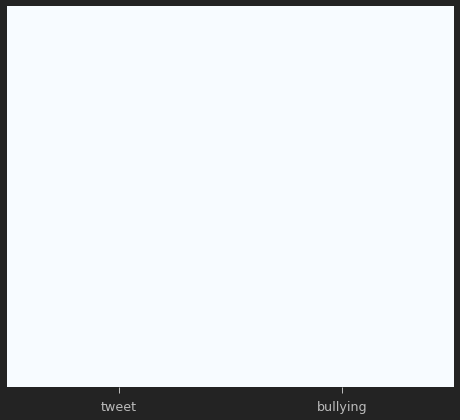

In [121]:
 sns.heatmap(tweets_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

array([[<AxesSubplot:title={'center':'bullying'}>]], dtype=object)

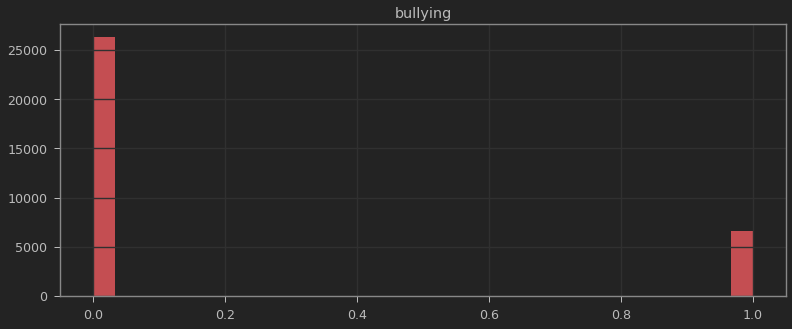

In [122]:
tweets_df.hist(bins = 30, figsize = (13,5), color = 'r')

MINI CHALLENGE #2: 
- Plot similar figure using seaborn countplot

/home/pc/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='bullying', ylabel='count'>

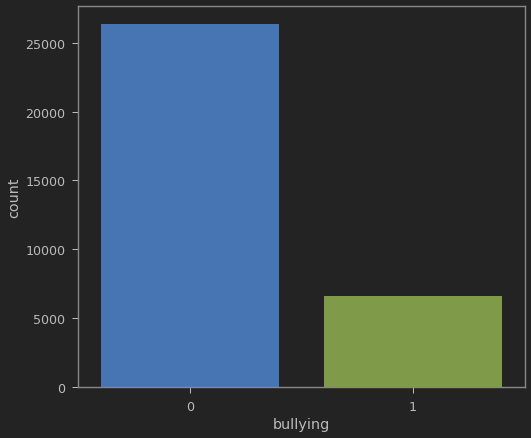

In [123]:
sns.countplot(tweets_df['bullying'], label = "Count") 

In [124]:
# Let's get the length of the messages
tweets_df['length'] = tweets_df['tweet'].apply(len)

In [125]:
tweets_df

tweet  bullying  length
1      anti greek nationalis wikipedia hi alexikoua y...         1     233
2               dis hoe wasnt dis violent lottery ticket         1      40
3       better atabay helping banned vandals pushing pov         0      48
4      camelcase sicko camelcase camelcase rule r bal...         0      70
5      hi requested arbitration wikipedia requests ar...         0     231
...                                                  ...       ...     ...
32995  proposition ya hey got propositon heres deal i...         0      67
32996     suggest report administrator wp request blocks         0      46
32997  still talking animals know asian folks would l...         1      74
32998  find extremely alarming someone would remove q...         0     124
32999  tha wats happening made message board go back ...         0     100

[32984 rows x 3 columns]

<AxesSubplot:ylabel='Frequency'>

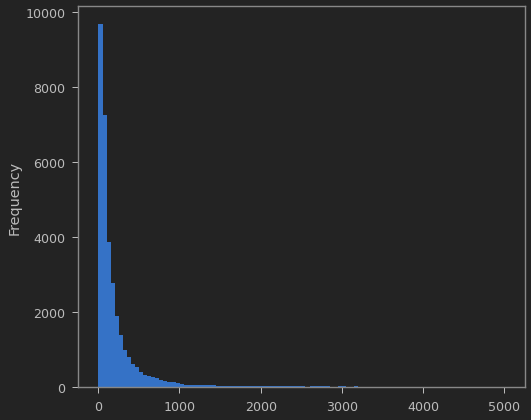

In [126]:
tweets_df['length'].plot(bins=100, kind='hist') 

In [127]:
tweets_df.describe()

bullying        length
count  32984.000000  32984.000000
mean       0.201158    215.164201
std        0.400872    355.637148
min        0.000000      3.000000
25%        0.000000     45.000000
50%        0.000000     98.000000
75%        0.000000    231.000000
max        1.000000   5000.000000

In [128]:
# Let's see the shortest message 
tweets_df[tweets_df['length'] == min(tweets_df['length'])]['tweet'].iloc[0]

'irc'

MINI CHALLENGE #3
- View the message with the average length

In [129]:
tweets_df[tweets_df['length'] == tweets_df[['length']].mean(axis=1)]['tweet'].iloc[0]

'anti greek nationalis wikipedia hi alexikoua yous vandalise wikipedia editing false information may chauvinist edit false information wikipedia nowhere percent greeks albania real information census vandalise wikipedia militant ideas'

In [130]:
positive = tweets_df[tweets_df['bullying']==0]

In [131]:
positive

tweet  bullying  length
3       better atabay helping banned vandals pushing pov         0      48
4      camelcase sicko camelcase camelcase rule r bal...         0      70
5      hi requested arbitration wikipedia requests ar...         0     231
6      nonetheless lactose hemiacetal group e g sucro...         0      73
7      revert much want never say permission attack l...         0      52
...                                                  ...       ...     ...
32994               bold text headline text phill smells         0      36
32995  proposition ya hey got propositon heres deal i...         0      67
32996     suggest report administrator wp request blocks         0      46
32998  find extremely alarming someone would remove q...         0     124
32999  tha wats happening made message board go back ...         0     100

[26349 rows x 3 columns]

In [132]:
negative = tweets_df[tweets_df['bullying']==1]

In [133]:
negative

tweet  bullying  length
1      anti greek nationalis wikipedia hi alexikoua y...         1     233
2               dis hoe wasnt dis violent lottery ticket         1      40
8                       yo bag gucci still ugly hoe shut         1      32
21     love family even need water pop red pill hoe g...         1      66
23                  kitten dose look like bastard fucker         1      36
...                                                  ...       ...     ...
32979               shut king bee stupid idiot vandalism         1      36
32984  never gonna ok nigga around alot bitches boys ...         1      67
32986                                    got body faggot         1      15
32987      duck face result walking pole tweeting retard         1      45
32997  still talking animals know asian folks would l...         1      74

[6635 rows x 3 columns]

# TASK #4: PLOT THE WORDCLOUD

In [134]:
sentences = tweets_df['tweet'].tolist()
len(sentences)

32984

In [135]:
sentences_as_one_string =" ".join(sentences)

In [136]:
sentences_as_one_string

'anti greek nationalis wikipedia hi alexikoua yous vandalise wikipedia editing false information may chauvinist edit false information wikipedia nowhere percent greeks albania real information census vandalise wikipedia militant ideas dis hoe wasnt dis violent lottery ticket better atabay helping banned vandals pushing pov camelcase sicko camelcase camelcase rule r baley mentions inapplicable hi requested arbitration wikipedia requests arbitration trey stone davenbelle wikipedia requests arbitration trey stone davenbelle evidence mentioned evidence presented bringing attention comments evidence welcome sincerely may utc nonetheless lactose hemiacetal group e g sucrose trehalose locked acetals revert much want never say permission attack lebanon yo bag gucci still ugly hoe shut thanks would used ping thanks include sentiments appreciate time took add much appreciated talk please testing sandbox thanks jul utc scott fivelson hello believe made considerable progress adding credibility sco

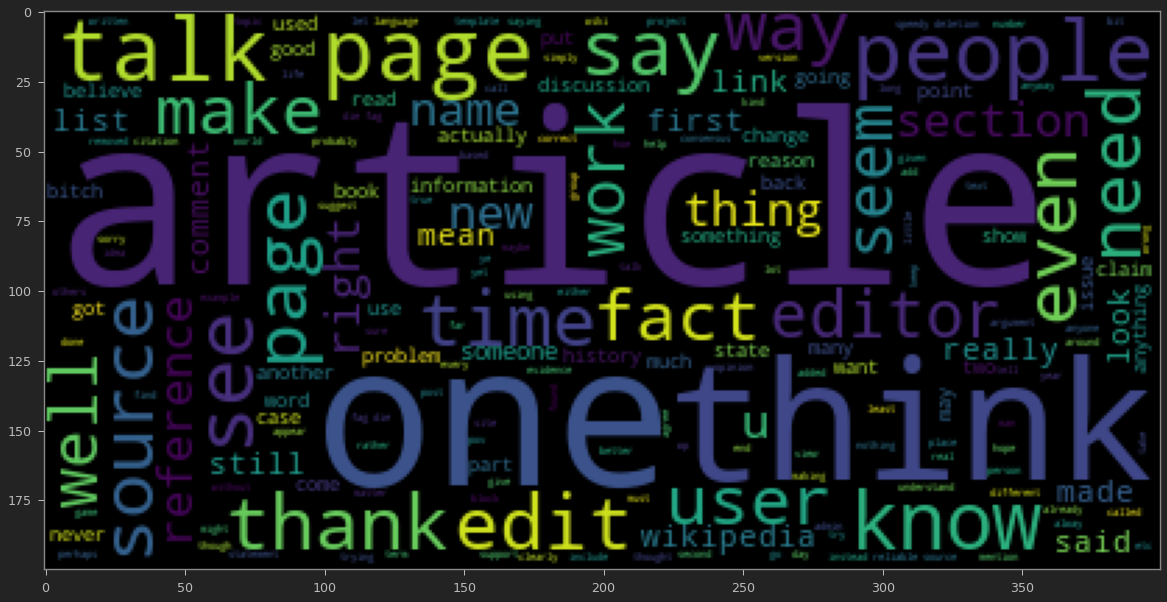

In [137]:
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

MINI CHALLENGE #4: 
- Plot the wordcloud of the "negative" dataframe. 
- What do you notice? Does the data make sense?

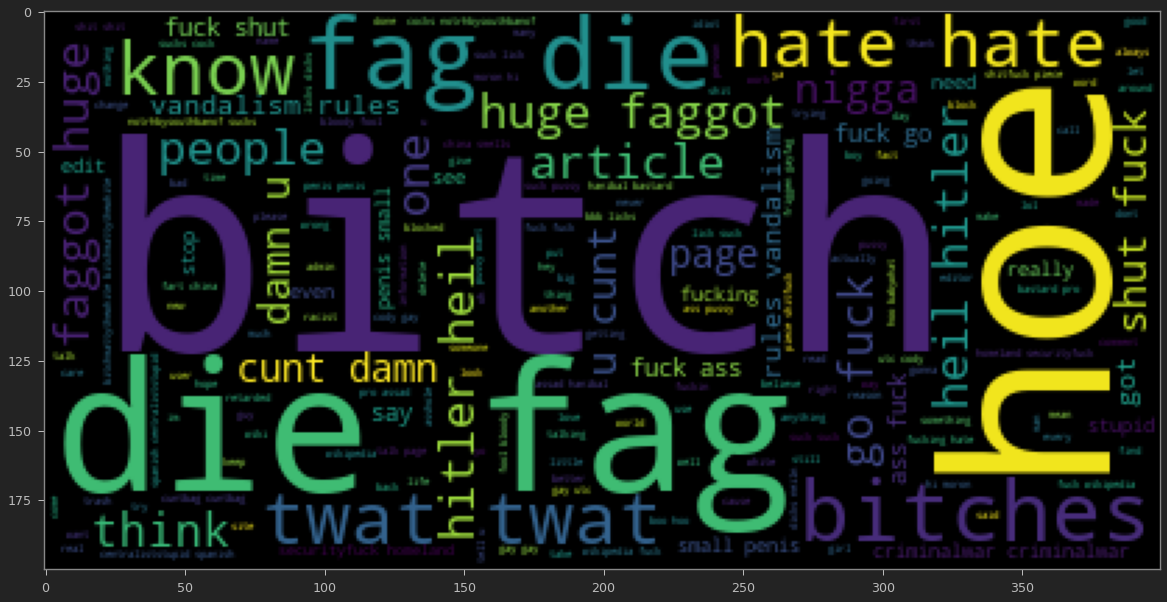

In [138]:
neg = negative['tweet'].tolist()
negsentence = " ".join(neg)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negsentence))


# TASK #5: PERFORM DATA CLEANING - REMOVE PUNCTUATION FROM TEXT

In [139]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [140]:
Test = 'Good morning beautiful people :)... I am having fun learning Machine learning and AI!!'

In [141]:
Test_punc_removed = [char for char in Test if char not in string.punctuation]
Test_punc_removed

['G',
 'o',
 'o',
 'd',
 ' ',
 'm',
 'o',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'b',
 'e',
 'a',
 'u',
 't',
 'i',
 'f',
 'u',
 'l',
 ' ',
 'p',
 'e',
 'o',
 'p',
 'l',
 'e',
 ' ',
 ' ',
 'I',
 ' ',
 'a',
 'm',
 ' ',
 'h',
 'a',
 'v',
 'i',
 'n',
 'g',
 ' ',
 'f',
 'u',
 'n',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'M',
 'a',
 'c',
 'h',
 'i',
 'n',
 'e',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'a',
 'n',
 'd',
 ' ',
 'A',
 'I']

In [142]:
# Join the characters again to form the string.
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

'Good morning beautiful people  I am having fun learning Machine learning and AI'

MINI CHALLENGE #5: 
- Remove punctuations using a different method


# TASK 6: PERFORM DATA CLEANING - REMOVE STOPWORDS

In [143]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/pc/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [144]:
# You have to download stopwords Package to execute this command
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [145]:
Test_punc_removed_join

'Good morning beautiful people  I am having fun learning Machine learning and AI'

In [146]:
Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]

In [147]:
Test_punc_removed_join_clean # Only important (no so common) words are left

['Good',
 'morning',
 'beautiful',
 'people',
 'fun',
 'learning',
 'Machine',
 'learning',
 'AI']

In [148]:
mini_challenge = 'Here is a mini challenge, that will teach you how to remove stopwords and punctuations!'

# TASK 7: PERFORM COUNT VECTORIZATION (TOKENIZATION)

In [149]:

from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first paper.','This document is the second paper.','And this is the third one.','Is this the first paper?']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)


In [150]:
print(vectorizer.get_feature_names())


['and', 'document', 'first', 'is', 'one', 'paper', 'second', 'the', 'third', 'this']


In [151]:
print(X.toarray())  

[[0 0 1 1 0 1 0 1 0 1]
 [0 1 0 1 0 1 1 1 0 1]
 [1 0 0 1 1 0 0 1 1 1]
 [0 0 1 1 0 1 0 1 0 1]]


# TASK #8: CHANGE MADE HERE, CORRECT EVERYWHERE

In [152]:
# Let's define a pipeline to clean up all the messages 
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords
import re
from nltk.stem import WordNetLemmatizer

def message_cleaning(message):
    message = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",message).split())
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word.lower() for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    wordnet_lemmatizer = WordNetLemmatizer()
    lemma_list = [wordnet_lemmatizer.lemmatize(word) for word in Test_punc_removed_join_clean]
    
    return lemma_list

In [153]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
func_countvectorizer = CountVectorizer(min_df=5,analyzer = message_cleaning, dtype = 'uint8')
tweets_countvectorizer = func_countvectorizer.fit_transform(tweets_df['tweet']).toarray()


In [154]:
#print(tweets_df.get_feature_names())


In [155]:
print(tweets_countvectorizer)  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [156]:
tweets_countvectorizer.shape

(32984, 11554)

In [157]:
tweets = pd.DataFrame(tweets_countvectorizer)
# 'zzzzzzzz'

In [158]:
# tweets = tweets_countvectorizer.toarray()

In [159]:
X = tweets_countvectorizer

In [160]:
y = tweets_df['bullying']

# TASK #10: TRAIN A NAIVE BAYES CLASSIFIER MODEL

In [161]:
X.shape

(32984, 11554)

In [162]:
y.shape

(32984,)

In [163]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tweets_countvectorizer, tweets_df['bullying'], test_size=0.2,random_state=10)

In [164]:
#del X

In [165]:
#del y 

In [166]:
X_train.dtype

dtype('uint8')

In [167]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

# TASK #11: ASSESS TRAINED MODEL PERFORMANCE  

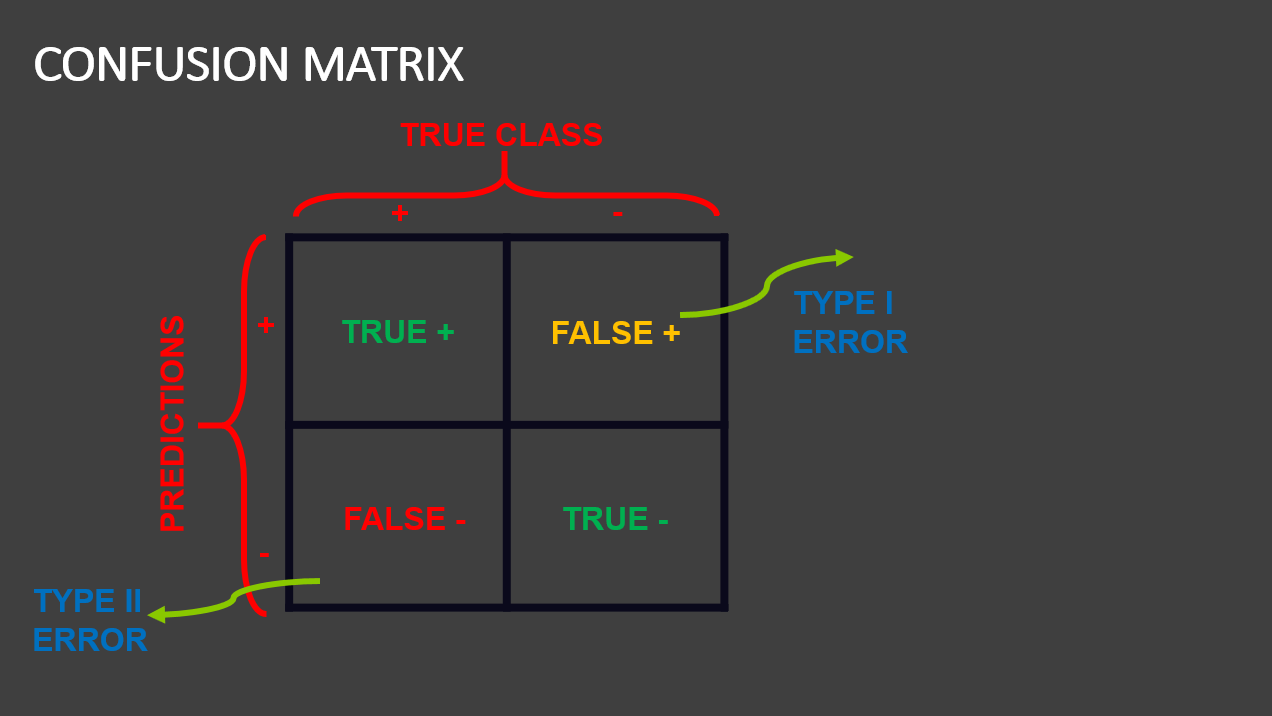

In [168]:
from sklearn.metrics import classification_report, confusion_matrix

<AxesSubplot:>

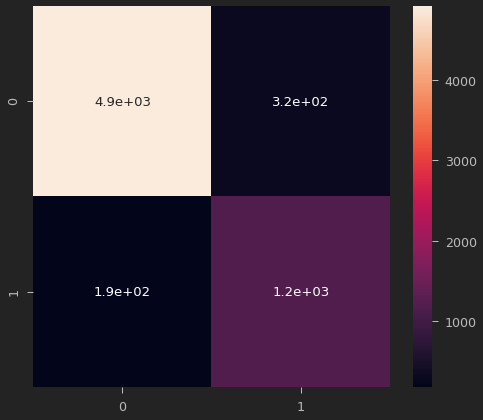

In [169]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [170]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      5236
           1       0.79      0.86      0.82      1361

    accuracy                           0.92      6597
   macro avg       0.87      0.90      0.89      6597
weighted avg       0.93      0.92      0.92      6597



# Trying Out sample strings

In [200]:
input_text = ["we tried to go there. but apparently, but we couldn't reach on time"]

input_vector = func_countvectorizer.transform(input_text)

print(input_vector)

  (0, 515)	1
  (0, 4406)	1
  (0, 8293)	1
  (0, 10391)	1
  (0, 10573)	1


In [201]:
result = NB_classifier.predict(input_vector)
print(result)

[0]
